# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?


<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dc_stat_think as dcst #functions created from datacamp statistical thinking
import seaborn as sns
import scipy.stats as stats

In [2]:
# read csv file and explore dataframe
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
#explore stats of dataframe
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


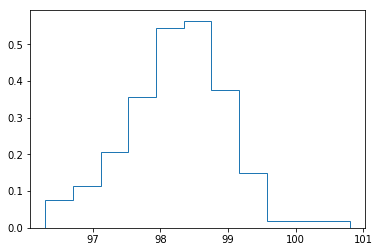

In [4]:
# Is the Distribution of Body Temperature normal?
# Create historgram of body temperature distribution

# Compute the number of bins using the Square Root Rule
# Compute number of data points: n_data
n_data = len(df.temperature)
# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)
# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

_= plt.hist(df.temperature, normed =True, histtype ='step' ,bins=n_bins)
plt.show()

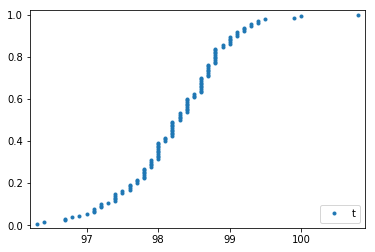

In [5]:
#Plot CDF of temperature sample 
# Generate CDF
x_temp, y_temp = dcst.ecdf(df.temperature)

# Plot CDF
_ = plt.plot(x_temp,y_temp, marker='.',linestyle='none')

# Make 2% margin
plt.margins(0.02)

# Make legend and show the plot
_ = plt.legend(('temperature'), loc='lower right')
plt.show()

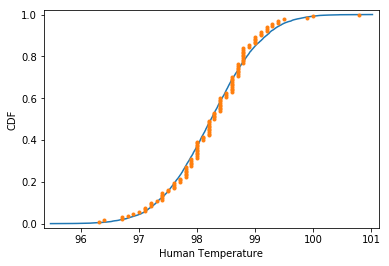

In [6]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)

# Sample out of a normal distribution with this mu and sigma: samples
sample = np.random.normal(mu, sigma, size = 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = dcst.ecdf(sample)
x,y = dcst.ecdf(df.temperature)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Human Temperature')
_ = plt.ylabel('CDF')
plt.show()

In [ ]:
## 1 Is the sample size large? Yes. Sample size is 130
# are the observations independent? Yes

### Is the true population mean really 98.6 F

### H<sub>0</sub> Null hypothesis: Population mean = 98.6 F
### H<sub>1</sub> alternative hypothesis: Population mean != 98.6 F


Use a one-sample test for this since we have only one sample to compare with.
In this situation use a z-statistic since the sample size is > 30

In [7]:
#compute the 95% confidence interval
conf_int = np.percentile(df.temperature,[2.5,97.5])
conf_int

array([ 96.7225,  99.4775])

In [8]:
#Calculate the difference from the mean and standard deviation
mean = df['temperature'].mean()
std = df['temperature'].std()

In [9]:
# format
print('Sample mean: {}'.format(mean))
print('\n')
print('Sample standard deviation : {}'.format(std))

Sample mean: 98.24923076923078


Sample standard deviation : 0.7331831580389454


In [26]:
# z statistic 
# population mean - sample mean / (standard deviation of sample / root(sample size)

S = ((std)/np.sqrt(len(df.temperature)))
                       
zstat = (98.6 - mean)/S                     

print('Z-Score : {}'.format(zstat))

Z-Score : 5.454823292364079


In [27]:
((std)/np.sqrt(len(df.temperature)))

0.06430441683789101

The z score from the sample temperature of 98.25 is 5.45 standard deviations away from the mean.  

In [28]:
prob = stats.norm.cdf(mean, 98.6, S)
print('P-value : {}'.format(prob))

P-value : 2.45107850705669e-08


### As the P-value < 0.05 confidence we can reject the null hypothesis

## In Progress

<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>

In [13]:
# one sample test
# Make an array of translated mean temperature: translated_mean_temp
translated_mean_temp = df.temperature - np.mean(df.temperature) + 98.6

# Take bootstrap replicates of sample translated temperature: bs_replicates
bs_replicates = dcst.draw_bs_reps(translated_mean_temp, np.mean, 10000)

# Compute fraction of replicates that are less than the observed temperature of the sample: p
p = np.sum(bs_replicates <= np.mean(df.temperature)) / 10000

# Compute fraction of replicates that are greater than the observed temperature of the sample: p
p1 = np.sum(bs_replicates >= np.mean(df.temperature)) / 10000

# Print the p-value
print('p = ', p)
print('p1 = ', p1)

p =  0.0
p1 =  1.0


<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>

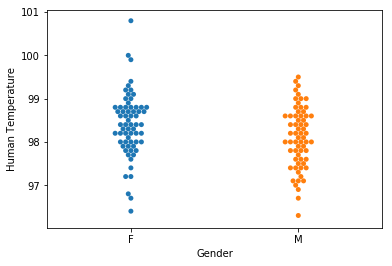

In [12]:
# Is there a significant difference between females and males?
# What does the data look like with a swarm plot?
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='gender', y='temperature', data=df)
# Label the axes
_ = plt.xlabel('Gender')
_ = plt.ylabel('Human Temperature')
# Show the plot
plt.show()

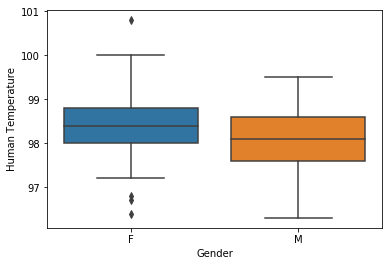

In [14]:
# Is there a significant difference between females and males?
# What does the data look like with a box plot?
# Create bee box plot with Seaborn's default settings
_ = sns.boxplot(x='gender', y='temperature', data=df)
# Label the axes
_ = plt.xlabel('Gender')
_ = plt.ylabel('Human Temperature')
# Show the plot
plt.show()

In [ ]:
# This will be a two-sample bootstrap hypothesis for the difference of means
#create 2 df of gender
female_df = 
male_df =

# Compute mean of temperatire: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

